# Table of Contents:

1. [EDA](#EDA)
2. [Logistic Regression](#logreg)
3. [Decision Tree and Random Forest](#dtrf)
4. [Support Vector Machine](#svm)
5. [K-Nearest-Neighbors](#knn)
6. [Naive Bayes](#NB)
7. [Clustering](#cluster)

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Reads the data from the UCI Machine Learning Repository as a pandas DataFrame
mushrooms = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data")
# Names the columns of the pandas DataFrame 
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
mushrooms.columns = columns

# 1. EDA <a name="EDA"></a>

In [3]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [4]:
mushrooms.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [5]:
# Prints the number of rows for each class label
print(mushrooms["class"].value_counts())
# Computes the percentage of the edible class 
round(mushrooms["class"].value_counts()[0]/(mushrooms["class"].value_counts()[0]
                                    + mushrooms["class"].value_counts()[1])*100, 2)

e    4208
p    3915
Name: class, dtype: int64


51.8

We can see there is a good balance of the two class labels across the samples.

Mushroom Features: ([good domain knowledge overview](https://datascienceplus.com/mushrooms-classification-part-1/))

![m](https://www.english-online.at/biology/mushrooms/parts-of-a-mushroom.gif) 

`cap-shape`: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s. ![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-cap-shape.jpg)

`cap-surface`: fibrous=f,grooves=g,scaly=y,smooth=s ![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-cap-surface.jpg)

`cap-color`: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y.

`bruises`: bruises=t,no=f. While identifying mushrooms, check for [bruising](https://www.mushroom-appreciation.com/identifying-mushrooms.html) by nicking the top and bottom of the cap and watching for any color change.  

`odor`: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s. 

`gill-attachment`: attached=a,descending=d,free=f,notched=n. ![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-gill-attachment.jpg)

`gill-spacing`: close=c,crowded=w,distant=d. ![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-gill-spacing.jpg)

`gill-color`: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y. 

`stalk-shape`: enlarging=e,tapering=t.   

`stalk-root`: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?. ![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-stalk.jpg)

`stalk-surface-above-ring`: fibrous=f,scaly=y,silky=k,smooth=s.  

`stalk-surface-below-ring`: fibrous=f,scaly=y,silky=k,smooth=s.  

`stalk-color-above-ring`: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y.  

`stalk-color-below-ring`: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y.  

`veil-type`: partial=p,universal=u. Tissue that connects the stem and the cap before the gills are exposed. ![m](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/1797-09-03_Agaricus_campestris_Plate_by_James_Sowerby.jpg/640px-1797-09-03_Agaricus_campestris_Plate_by_James_Sowerby.jpg)  

`veil-color`: brown=n,orange=o,white=w,yellow=y.

`ring-number`: none=n,one=o,two=t.

`ring-type`: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z. ![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-ring-type.jpg)  

`spore-print-color`:  black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y. For most mushrooms, if the cap is cut off and placed gill-side-down overnight, a powdery impression reflecting the shape of the gills (or pores, or spines, etc.) is formed (when the fruit body is sporulating). The color of the powdery print, called a spore print, is used to help classify mushrooms and can help to identify them.  

`population`: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y.  

`habitat`: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d. 


In [6]:
# Replaces "?" (UCI ML missing values are denoted by a question mark) with np.NaN
# across all datapoints of dataset
dataset = mushrooms.replace('?', np.NaN)
# Gets the number of missing values on each column
dataset.isna().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

As we can see, the only column with missing values is `stalk-root`. This is basically the type of root `stalk-root`: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?. ![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-stalk.jpg). 

In [7]:
# Computes the contingency table for stalk-root and the class labels
stalk_root_edibility_table = pd.crosstab(index=dataset["class"], columns=dataset["stalk-root"])
stalk_root_edibility_table

stalk-root,b,c,e,r
class,,,,
e,1920,512,864,192
p,1856,44,255,0


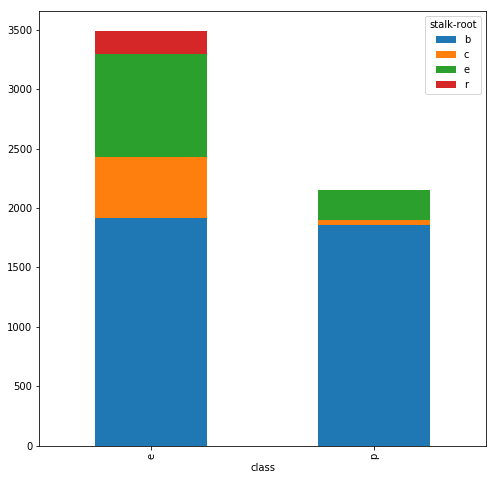

In [8]:
# Plots a stacked column chart for each class label 
stalk_root_edibility_table.plot(kind="bar", figsize=(8,8),stacked=True)
plt.show() 

In [9]:
# Subsets the dataset between the edible and the poisonous class labels
dataset_p = dataset[dataset["class"] == "p"]
dataset_e = dataset[dataset["class"] == "e"] 

In [10]:
print(" poison")
print(dataset_p["stalk-root"].value_counts())
print("\n", "not poison")
print(dataset_e["stalk-root"].value_counts())

 poison
b    1856
e     255
c      44
Name: stalk-root, dtype: int64

 not poison
b    1920
e     864
c     512
r     192
Name: stalk-root, dtype: int64


Based on this, we can see that `stalk-root` is probably not one of the most powerfult predictors. The bulbous roots have the same proportion of class labels, and while the equal and club stalks are more prevalent on the edible mushrooms, it shouldn't make much of a difference on the machine learning process. However, we can see that all the rooted mushrooms are edible, but the sample size is not big enough (about 2.3% of the total sample size) to be relevant. We could run a $\chi^2$-test, but it would not really shed much more light in the matter. Instead, we will implement our models on slightly different datasets and compare them. 

1. Dataset without column `stalk-root`.
2. Raw dataset with `?` as `np.NaN`.
3. Raw dataset (treating `?` as possible value of `stalk-root`).
4. Dataset without rows with missing values (losing 30% of our data).

Let's get this different datasets now, so we don't have to do it later.

In [11]:
# Gets the dataset without the problematic feature
mushrooms_no_stalk_root = mushrooms.drop("stalk-root", axis = 1)
# Gets the raw dataset with missing values as np.NaN
mushrooms_raw_NaN = mushrooms.replace("?", np.NaN)
# Gets the dataset without missing values
mushrooms_without_NaN = mushrooms_raw_NaN.dropna()

We could also impute the missing values by mode imputation

In [12]:
dataset["stalk-root"].value_counts()

b    3776
e    1119
c     556
r     192
Name: stalk-root, dtype: int64

In [13]:
# Imputes the missing values on the dataset
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
mushrooms_imputed = pd.DataFrame(imp.fit_transform(dataset), columns = columns)

In [14]:
mushrooms_imputed["stalk-root"].value_counts()

b    6256
e    1119
c     556
r     192
Name: stalk-root, dtype: int64

but this is not a very good approach as the other values don't play any roll in the matter. A better approach would be to impute all classes on the same proportion as the non-missing data.

In [15]:
# Subsets the dataset to only get the rows with missing values
dataset_stalk_root_nan = dataset.iloc[
    dataset["stalk-root"][
    dataset["stalk-root"].isna()
].index
] 

In [16]:
dataset_stalk_root_nan["class"].value_counts()

p    1760
e     720
Name: class, dtype: int64

We can see that the rows with missing values consist of 2.44 times more poisonous class than edible. Thus, we are going to take this into account. Out of all the missing rows, 29 % will need to have the `dataset_e["stalk-root"].value_counts()` distribution, while 71% will have the `dataset_p["stalk-root"].value_counts()` distribution. 

In [17]:
number_class_b = round(dataset_stalk_root_nan.shape[0]*(
    0.29*(dataset_e["stalk-root"].value_counts()[0]/(
    dataset_e["stalk-root"].value_counts()[0] + dataset_e["stalk-root"].value_counts()[1] +
    dataset_e["stalk-root"].value_counts()[2] + dataset_e["stalk-root"].value_counts()[3])) + 
    0.71 * (dataset_p["stalk-root"].value_counts()[0]/(
    dataset_p["stalk-root"].value_counts()[0] + dataset_p["stalk-root"].value_counts()[1] +
    dataset_p["stalk-root"].value_counts()[2])))) - 1 # to make the rounds make sense

number_class_e = round(dataset_stalk_root_nan.shape[0]*(
    0.29*(dataset_e["stalk-root"].value_counts()[1]/(
    dataset_e["stalk-root"].value_counts()[0] + dataset_e["stalk-root"].value_counts()[1] +
    dataset_e["stalk-root"].value_counts()[2] + dataset_e["stalk-root"].value_counts()[3])) + 
    0.71 * (dataset_p["stalk-root"].value_counts()[1]/(
    dataset_p["stalk-root"].value_counts()[0] + dataset_p["stalk-root"].value_counts()[1] +
    dataset_p["stalk-root"].value_counts()[2]))))

number_class_c = round(dataset_stalk_root_nan.shape[0]*(
    0.29*(dataset_e["stalk-root"].value_counts()[2]/(
    dataset_e["stalk-root"].value_counts()[0] + dataset_e["stalk-root"].value_counts()[1] +
    dataset_e["stalk-root"].value_counts()[2] + dataset_e["stalk-root"].value_counts()[3])) + 
    0.71 * (dataset_p["stalk-root"].value_counts()[2]/(
    dataset_p["stalk-root"].value_counts()[0] + dataset_p["stalk-root"].value_counts()[1] +
    dataset_p["stalk-root"].value_counts()[2]))))

number_class_r = round(dataset_stalk_root_nan.shape[0]*(
    0.29*(dataset_e["stalk-root"].value_counts()[3]/(
    dataset_e["stalk-root"].value_counts()[0] + dataset_e["stalk-root"].value_counts()[1] +
    dataset_e["stalk-root"].value_counts()[2] + dataset_e["stalk-root"].value_counts()[3]))))

Not sure if this make that much sense, I think the change of imputting a wrong missing value is higher than with the mode, where we at least are guranteed to impute a percentage of values correctly (given they follow the same distribution). 

### TODO: Identify most easly features to look at in a mushroom 

# 2. Logistic Regression <a name="logreg"></a>

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

## 4. 

In [19]:
X = mushrooms_without_NaN.drop("class", axis = 1)
X = pd.get_dummies(X).values
y = mushrooms_without_NaN["class"].values
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

1.0

In [20]:
def get_distribution(clf, X, y, feature, class_):
    """
    Reference: the code for this function is from Midterm_solution.ipynb
    Calculate the probability distribution of a class based on a feature
    :param clf: the logistic regression classifier
    :param X: the feature vector
    :param y: the target vector
    :param feature: a feature
    :param class_: a class label of the target
    :return: the probability distribution, which is a dictionary 
             where the key is the value of the feature and value the probability:
             distribution = {val_1: proba_1, val_2: proba_2, ..., val_n: proba_n}
             
    """
    
    # Get the column number of the feature
    dummy_columns = list(pd.get_dummies(mushrooms).columns)
    col = dummy_columns.index(feature)
    
    # Get the encoded number of the class_
    num = le.transform([class_])
    
    # Get X_sparse
    # Here, all the columns are zeros except for column col, where X_sparse[:, col] = X[:, col]
    X_sparse = np.zeros((X.shape[0], X.shape[1]))
    X_sparse[:, col] = X[:, col]
    
    # Get the unique value and the corresponding index in column col
    vals, idxs = np.unique(X_sparse[:, col], return_index=True)
    
    # Get the distribution
    distribution = {}
    # For each unique index
    for idx in idxs:
        # Get the corresponding value
        val = X_sparse[idx, col]
        
        # Get the probability of each class
        probas = clf.predict_proba(X_sparse[idx, :].reshape(1, -1)).ravel()

        # Get the probability of the class
        proba = probas[num]
        
        distribution[val] = proba
        
    return distribution

def plot_distribution(feature, class_):
    """
    Reference: the code for this function is from Midterm_solution.ipynb
    Plot the probability distribution of a class based on the feature
    :param distribution: the probability distribution, which is a dictionary 
                         where the key is the value of the feature and value the probability:
                         distribution = {val_1: proba_1, val_2: proba_2, ..., val_n: proba_n}
    :param feature: a feature
    :param class_: a class label of the target
    """
    
    prob = {}
    for i in pd.get_dummies(mushrooms).columns:
        if feature in i:
            distribution = get_distribution(logreg, X_train, y_train, i, class_)
            probas = [distribution[val] for val in sorted(distribution.keys())]
            prob[i] = probas[1][0]
    probas_df = pd.DataFrame(prob, index = [""]).T
    
    # Plot the bar chart
    #probas_df.plot(kind='bar', figsize=(25, 10), fontsize=30, legend=False, colormap = "plasma")
    plt.figure(figsize=(25,10))
    probs = [probas_df.loc[i][0] for i in probas_df.index]
    barlist = plt.bar(list(probas_df.index), probs)
    color = ['b', 'g', 'r', 'c', 'm', 'y',
             'tab:blue', 'tab:orange', 'tab:green', 'tab:red',
             'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    for i in range(len(barlist)):    
        barlist[i].set_color(color[i])
    plt.xlabel('Feature value', fontsize=30)
    plt.ylabel('Probability', fontsize=30)
    plt.xticks(range(len(prob.keys())), prob.keys(), fontsize = 30)
    plt.title('P(' + class_ + ' | ' + feature + ')', fontsize=30, loc='center')
    plt.tight_layout()
    plt.show()
    
    return probas_df

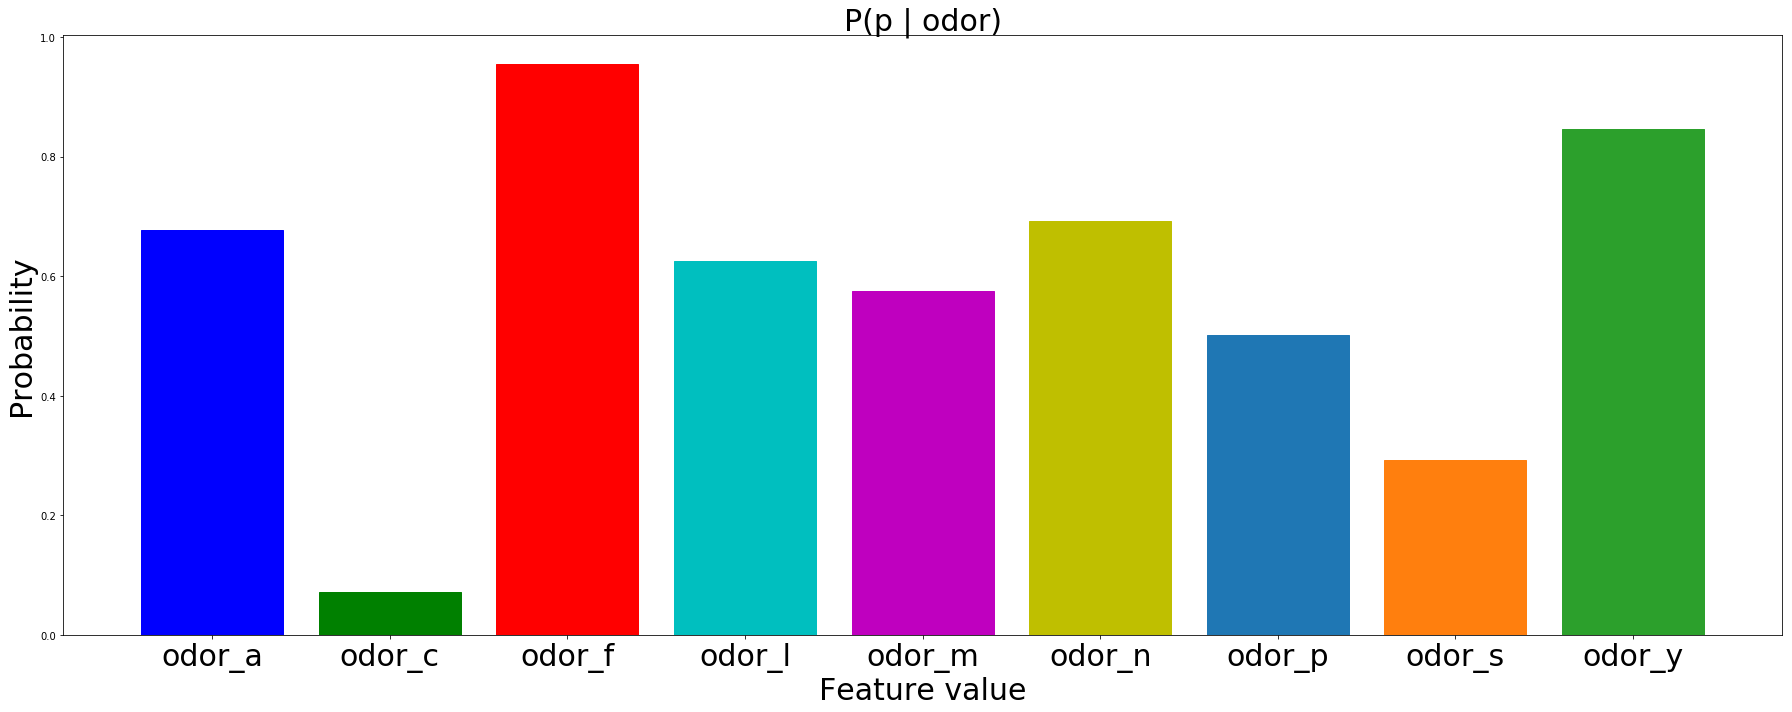

,
odor_a,0.677258
odor_c,0.072389
odor_f,0.955103
odor_l,0.625588
odor_m,0.574873
odor_n,0.692220
odor_p,0.501145
odor_s,0.292232
odor_y,0.845491


In [21]:
plot_distribution("odor", "p")

In [22]:
mushrooms[mushrooms["odor"] == "n"]["class"].value_counts()

e    3408
p     120
Name: class, dtype: int64

In [24]:
mushrooms[mushrooms["odor"] == "a"]["class"].value_counts()

e    400
Name: class, dtype: int64

In [23]:
mushrooms["odor"].value_counts()

n    3528
f    2160
y     576
s     576
l     400
a     400
p     255
c     192
m      36
Name: odor, dtype: int64

# 3. Decision Tree and Random Forest <a name="dtrf"></a>

Here we will implement Decision Tree and Random Forest Classifiers from [sklearn](http://scikit-learn.org/stable/). They don't support [categorical variables](https://stats.stackexchange.com/questions/152433/will-decision-trees-perform-splitting-of-nodes-by-converting-categorical-values) without [one-hot encoding](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/) so we will have to one-hot encode them and thus create lots of new columns.

## TODO: Try using H20 instead and compare. (https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

As we are going to be doing basically the same process on different datasets, let's define some functions now.

In [21]:
def preprocess(data):
    """
    Preprocesses the input dataset and returns the training and testing data to pass on the clasiffiers
    data: dataset to be used to learn the model 
    """
    # Gets the predictor features 
    X = data.drop(["class"], axis=1)
    # And encodes them (they are all categorical)
    X = pd.get_dummies(X).values
    # Gets the target feature (binary)
    y = data["class"].values

    le = LabelEncoder()
    # Encodes the target
    y = le.fit_transform(y)

    # Splits between training and testing, stratifying by the target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
    
    # No need to standardize as we only have 1s and 0s for all of our variables (they are all categorical).
    # This also makes it easier to interpret the decission tree. 

    return X_train, y_train, X_test, y_test

def train_and_test(model, train_data, test_data):
    """
    Trains the model on the training data, prints the score for such model evaluating it on the testing data
    and also returns the learned model
    model: classifier to be used
    train_data: [X_train, y_train]
    test_data: [X_test, y_test]
    """
    # Fits the training data to a Decision Tree
    model.fit(train_data[0], train_data[1])
    # Evaluates the model using the testing data
    print(model.score(test_data[0], test_data[1]))
    # Returns the learned tree
    return model

def tree_plot(tree, data):
    """
    returns the graph to plot the decision tree
    tree: decision tree to be plotted
    data: dataset used to learn the tree
    """
    dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['e', # e comes firts because it is assigned a 0 by the LabelEncoder
                                        'p'],
                           feature_names=pd.get_dummies(data.drop(["class"], axis=1)).columns,
                           out_file=None) 

    return graph_from_dot_data(dot_data) 

## 3.1. Dataset without stalk-root

In [24]:
# Preprocesses the dataset
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root)

In [25]:
# Prints that statement if X_train has anything else than 1 or 0 (checking the reason for not standardizing)
for i in X_train:
    if 1 not in i or 0 not in i:
        print("They are not all categorical")
# Does the same for X_test
for i in X_test:
    if 1 not in i or 0 not in i:
        print("They are not all categorical")

In [26]:
# Trains and computes the accuracy of the sklearn default decision tree on the testing data
# and also gets the learned tree
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


Well and we have a perfect score right at the start, which is actually to be expected as we have so much data and the nature of the decision tree is very well suited for this problem. (Even so, let's cross-validate later).

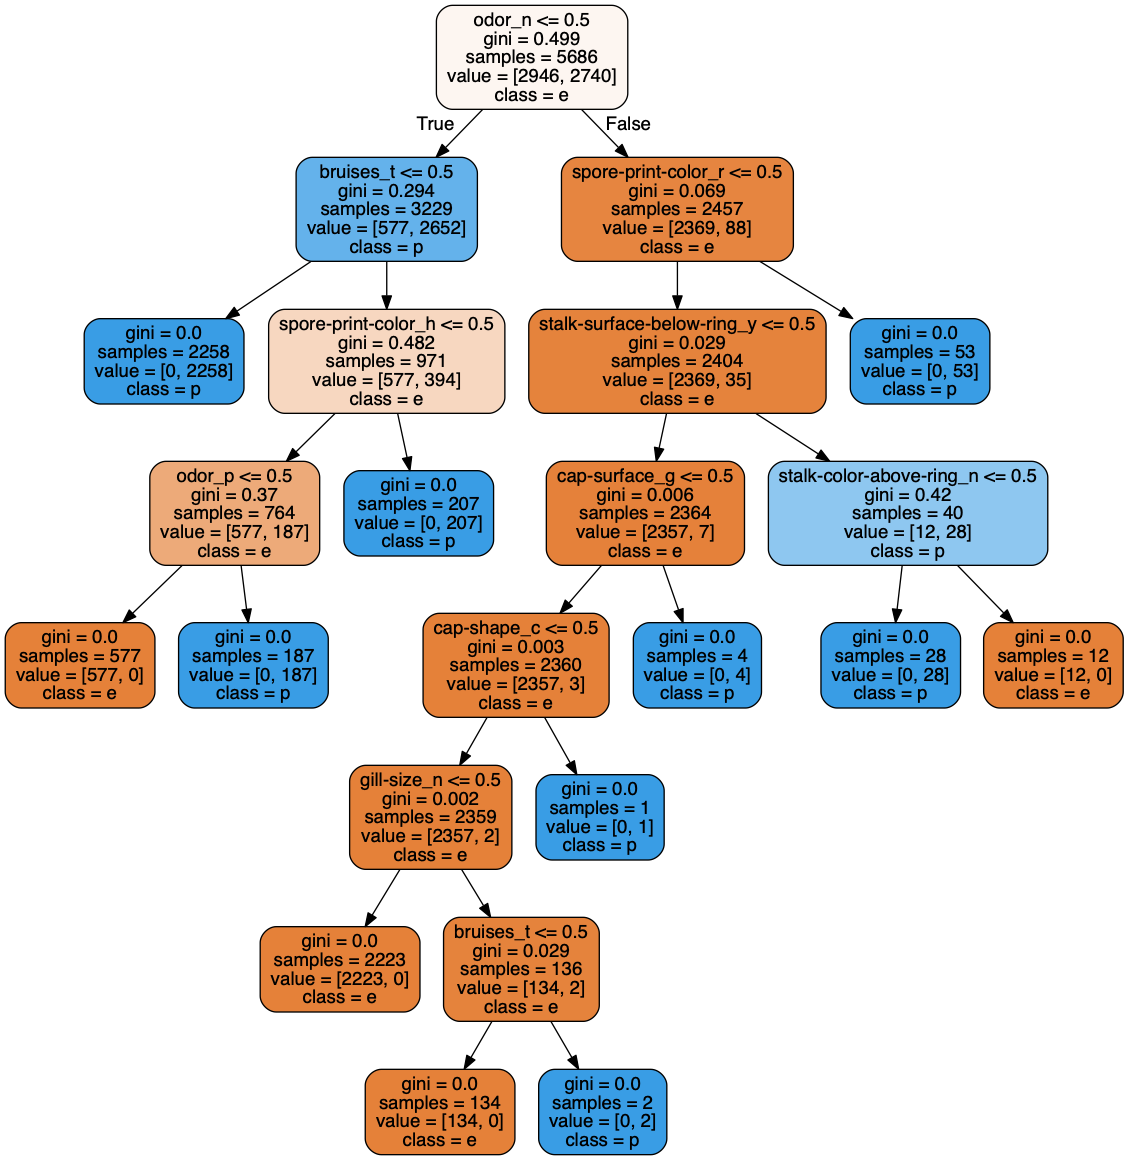

In [27]:
# Plots the tree we just learned
graph = tree_plot(tree, mushrooms_no_stalk_root)
Image(graph.create_png()) 

The leaves structure is as follows: `feature_class` $\leq$ 0.5 means mushroom does not have such class of such feature. Thus, the left branch leads to the part of the dataset with `feature` $\neq$ `class`, and the right branch leeads to `feature` $=$ `class`. `gini` measures the gini impurity at the leaf. `samples` gives the total number of rows at the leaf, and `values` tell the number of samples with class [edible, poisonous], while `class` says the most frequent class and the color is indicative of the percentage presence of each class.

Here we can already draw some interesting conclusions, such as that a mushroom with some odor and that doesn't bruise is automatically posionous. However, let's remember that this is only true for the two genus our data comes from. Let's make sure of this fact 

In [28]:
# Subsets the dataset following the rules learned by the tree and gives the unique labels
mushrooms[mushrooms["odor"] != "n"][mushrooms["bruises"] != "t"]["class"].value_counts()

p    3252
Name: class, dtype: int64

Notice that we are getting more datapoints than 2258 because the plotted tree is the one learned on the training data. To get the whole tree and see that it will be the same, let's do the same but on the whole data.

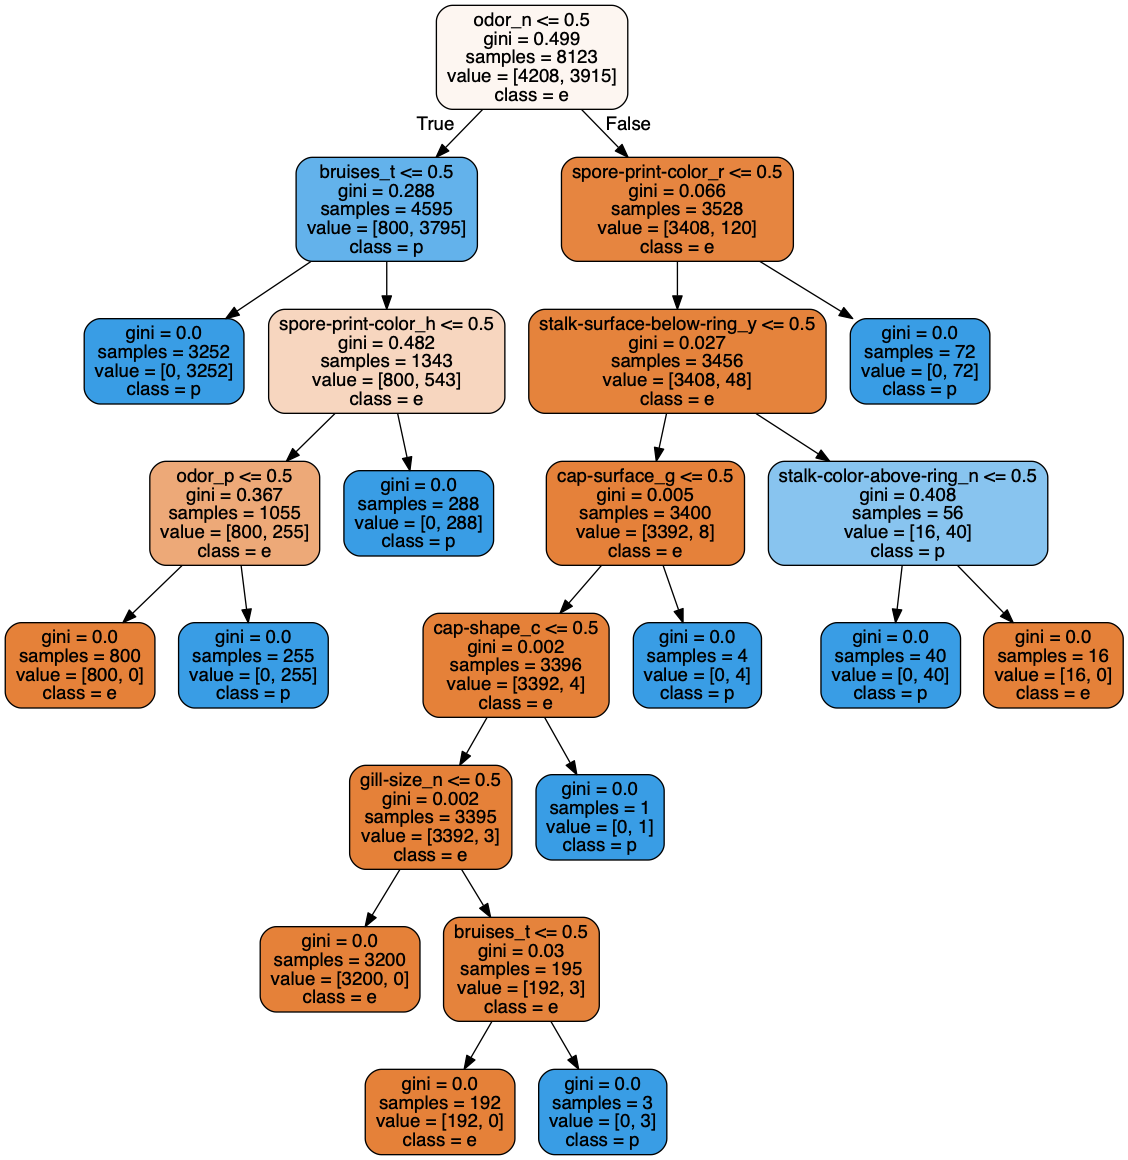

In [29]:
# Gets the predictor features 
X = mushrooms_no_stalk_root.drop(["class"], axis=1)
# And encodes them (they are all categorical)
X = pd.get_dummies(X).values
# Gets the target feature (binary)
y = mushrooms_no_stalk_root["class"].values
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X, y)
graph = tree_plot(tree, mushrooms_no_stalk_root)
Image(graph.create_png()) 

While this tree could already be the one to hand out to potential novices, let's keep going 

In [30]:
# Computes the number of combinations of all features
combination = 1
for i in mushrooms.columns:
    combination = combination * mushrooms[i].unique().shape[0]
print(combination)

243799621632000


In [31]:
# Cross-validation and Hyperparameter Tuning
pipe = Pipeline([('clf', DecisionTreeClassifier(random_state = 0))])

param_grid = {'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}

gs = GridSearchCV(estimator=pipe,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=1)) 
# Fit the pipeline
gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators
print(gs.best_score_, gs.best_params_, gs.best_estimator_)

0.9996482588814632 {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2} Pipeline(memory=None,
     steps=[('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))])


It looks that the split for cross-validation makes the learning unable to get a perfect score.

## 3.2 Raw dataset with missing values

In [32]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_raw_NaN)
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


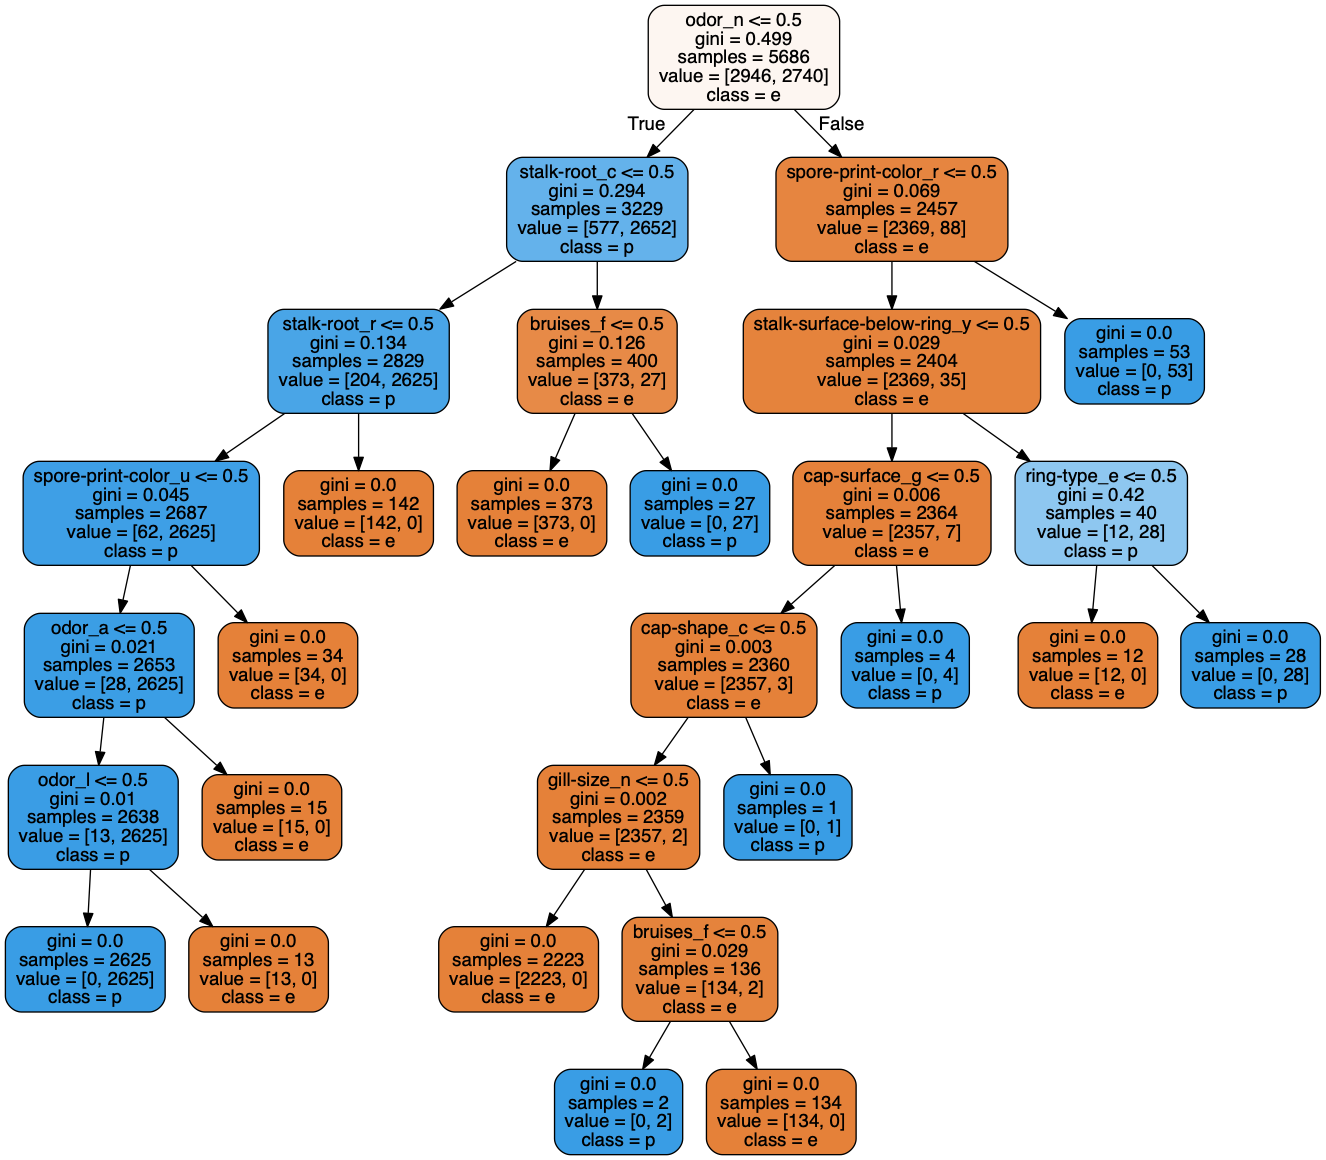

In [33]:
graph = tree_plot(tree, mushrooms_raw_NaN) 
Image(graph.create_png())

In [34]:
gs = GridSearchCV(estimator=pipe,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=1)) 
# Fit the pipeline
gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators
print(gs.best_score_, gs.best_params_, gs.best_estimator_)

0.9996482588814632 {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2} Pipeline(memory=None,
     steps=[('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))])


The tree changes but the score is actually the same. It seems that training with or without `stalk-root` gives the same accuracy, but actually `stalk-root` is almost at the top of the tree on some leaves, which is an indication that although `stalk-root` is a significant predictor, a combination of the some of the rest of the predictors can do the same job. We can also see that the tree is a little bit more complex in this last case.

## 3.3 Raw dataset treating "?" as another class

In [35]:
X_train, y_train, X_test, y_test = preprocess(mushrooms)
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


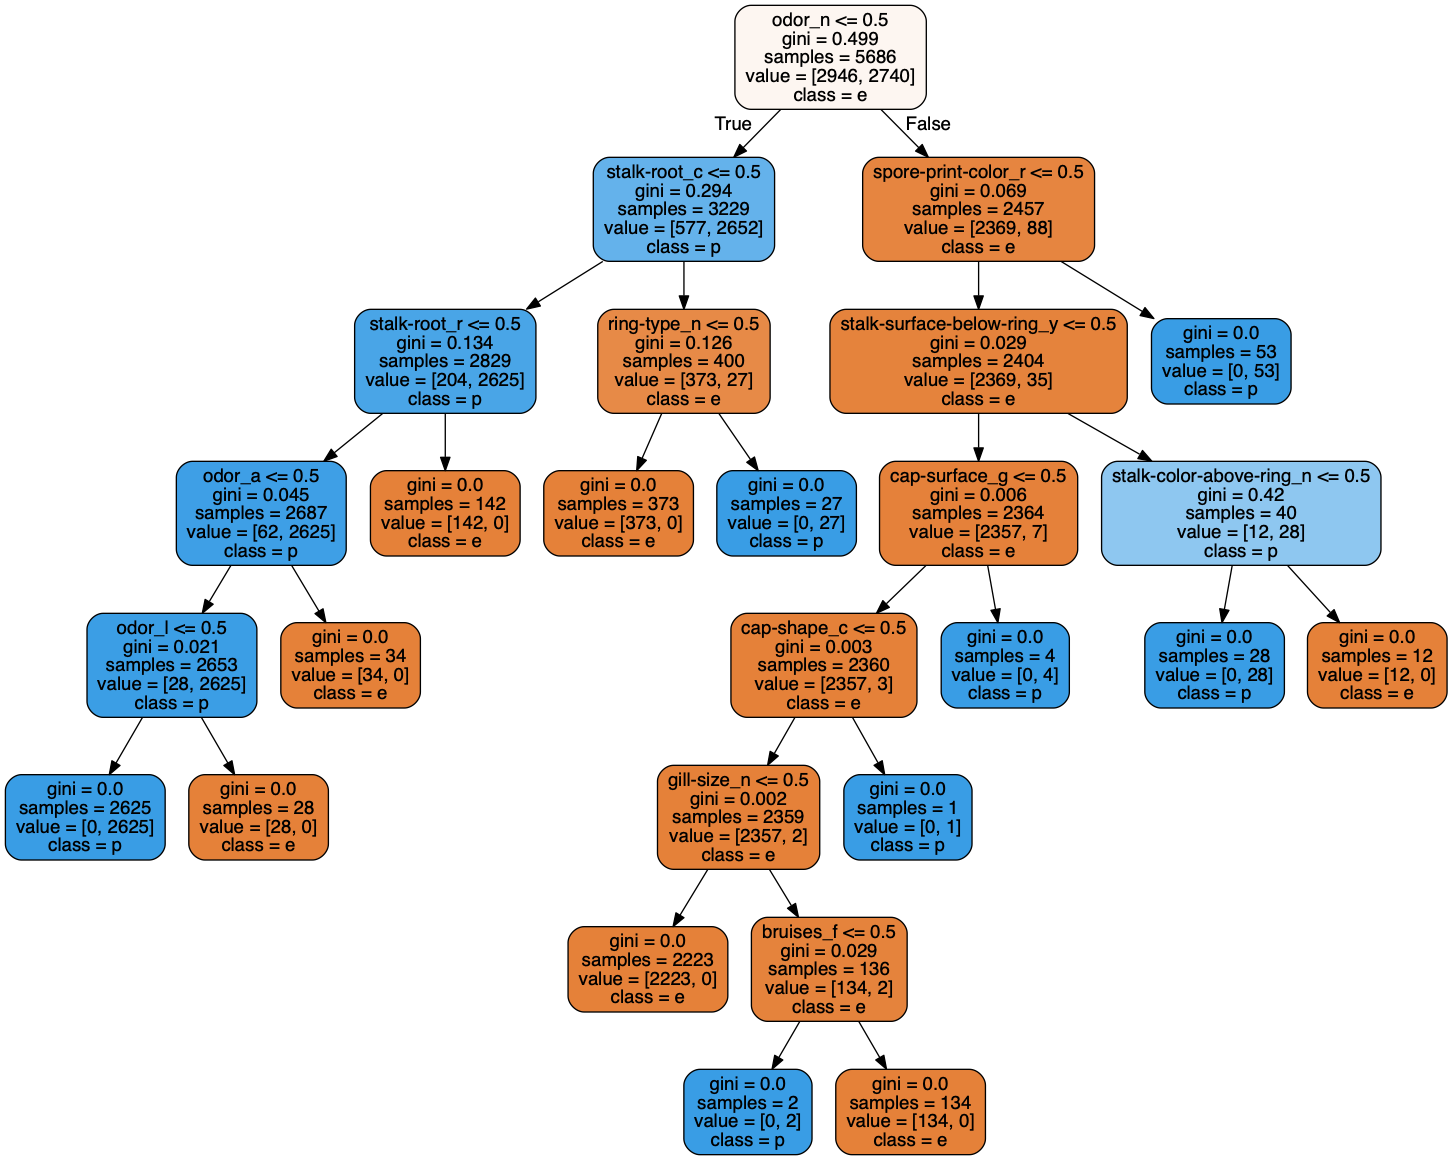

In [36]:
graph = tree_plot(tree, mushrooms) 
Image(graph.create_png())

In [37]:
gs = GridSearchCV(estimator=pipe,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=1)) 
# Fit the pipeline
gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators
print(gs.best_score_, gs.best_params_, gs.best_estimator_)

0.9996482588814632 {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2} Pipeline(memory=None,
     steps=[('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))])


Same score, the tree does change a little bit but not so much.

## 3.4 Dataset without rows with missing values

In [38]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN)
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


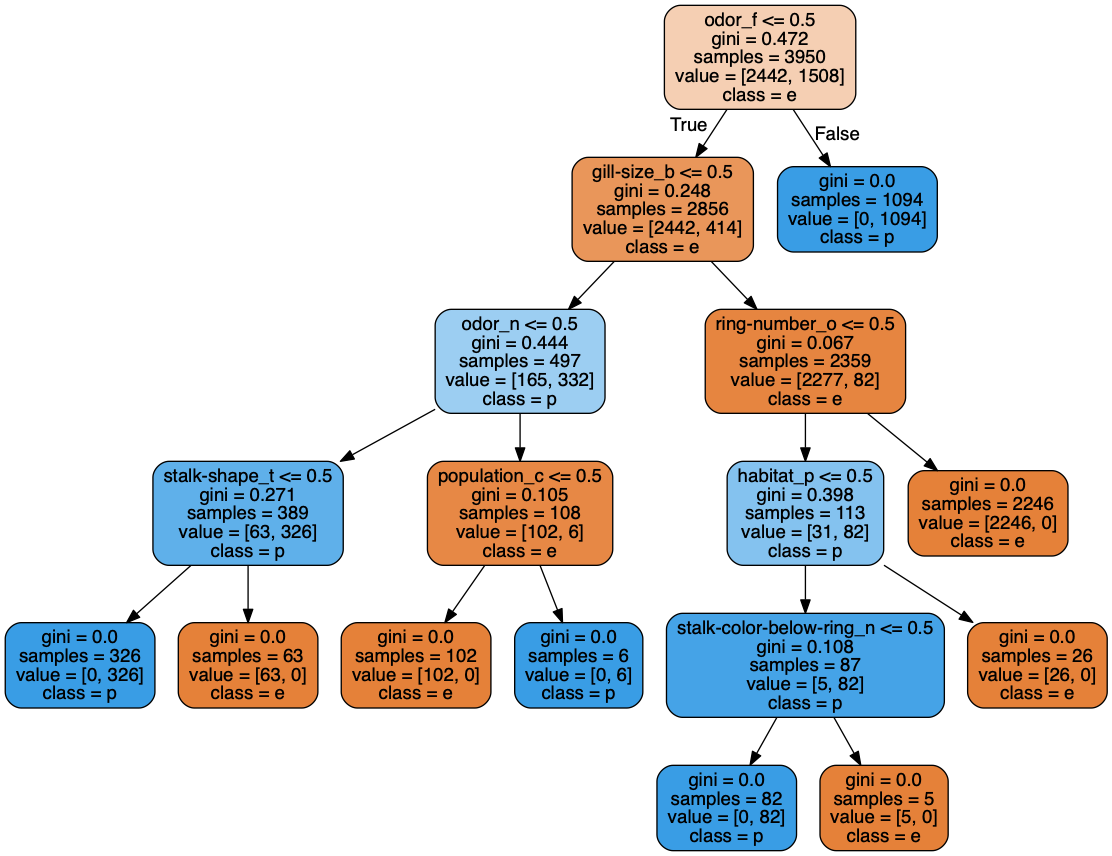

In [39]:
graph = tree_plot(tree, mushrooms_without_NaN) 
Image(graph.create_png())

In [40]:
gs = GridSearchCV(estimator=pipe,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=1)) 
# Fit the pipeline
gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators
print(gs.best_score_, gs.best_params_, gs.best_estimator_)

1.0 {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2} Pipeline(memory=None,
     steps=[('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))])


Removing all missing values but keeping all the rows gives a perfect score... let's check some of the rules learned by this tree.

In [41]:
mushrooms[mushrooms["odor"] == "f"]["class"].value_counts()

p    2160
Name: class, dtype: int64

In [42]:
mushrooms[mushrooms["odor"] != "f"][mushrooms["gill-size"] == "b"][mushrooms["ring-number"] == "o"]["class"].value_counts()

e    3392
Name: class, dtype: int64

## TODO: Fill this up a bit more

## 3.5 Imputing missing values 

In [43]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_imputed)
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


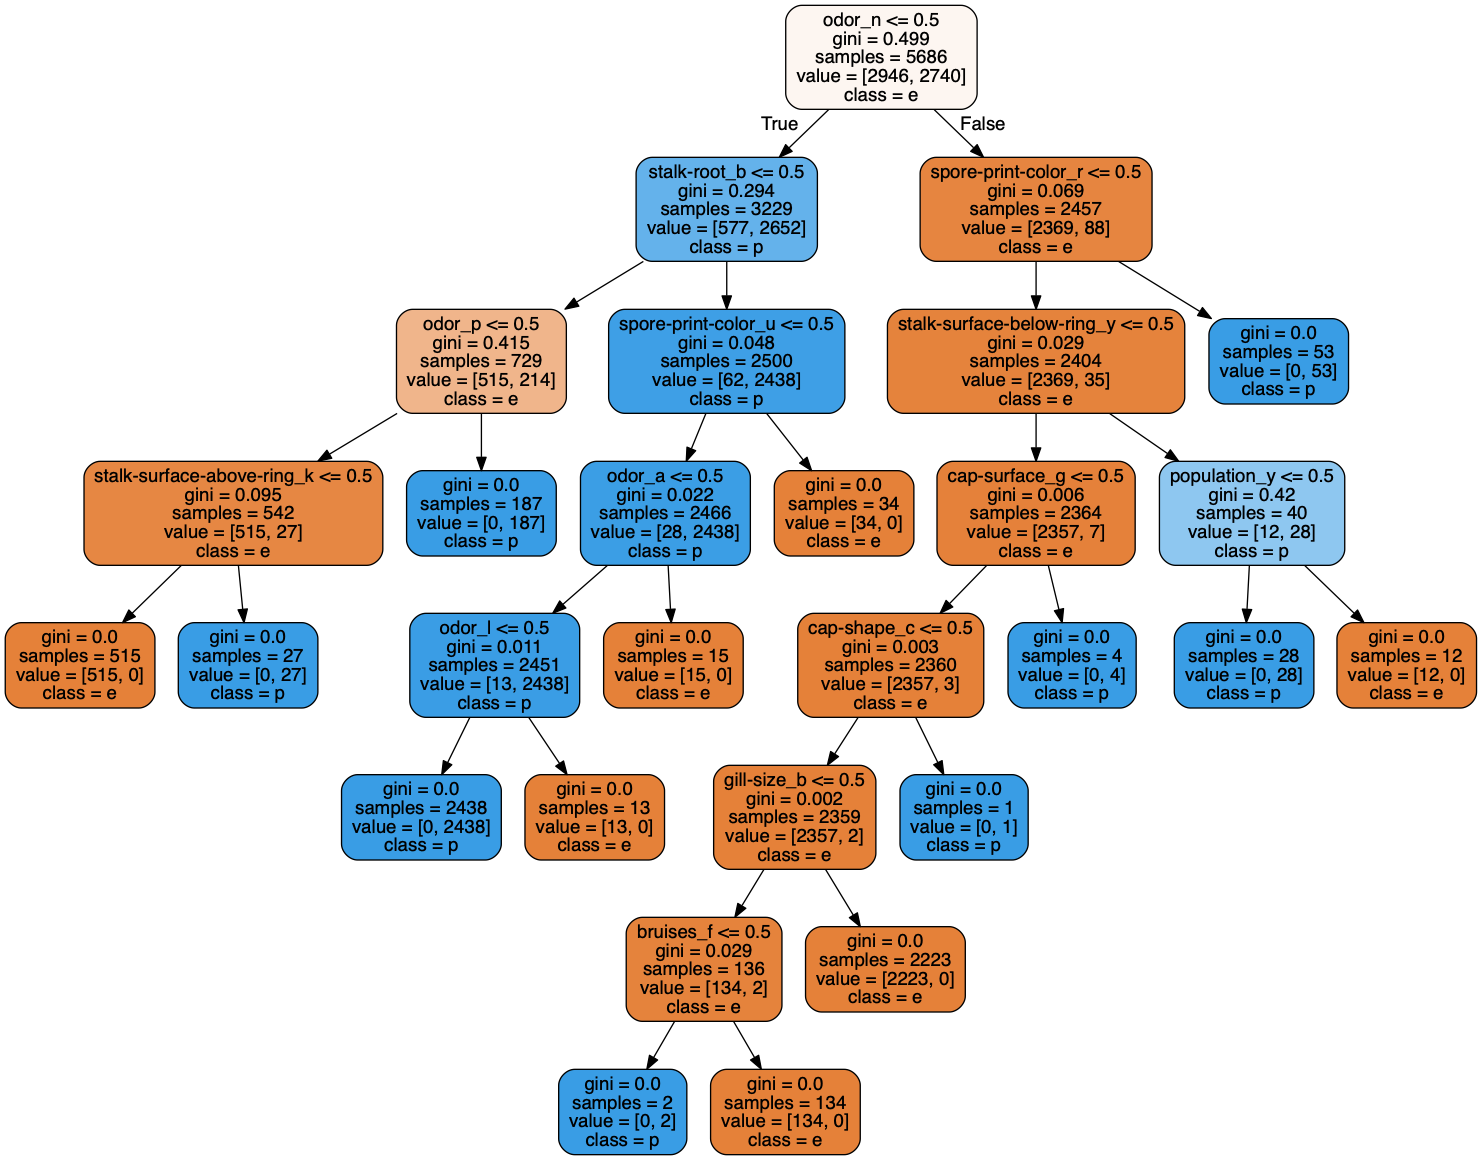

In [44]:
graph = tree_plot(tree, mushrooms_imputed)  
Image(graph.create_png())

In [45]:
gs = GridSearchCV(estimator=pipe,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=1)) 
# Fit the pipeline
gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators
print(gs.best_score_, gs.best_params_, gs.best_estimator_)

0.9996482588814632 {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2} Pipeline(memory=None,
     steps=[('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))])


# Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

### 2.

In [94]:
X_train, y_train, X_test, y_test = preprocess(dataset_raw_NaN)
forest = train_and_test(RandomForestClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


/Users/Pedro./anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Now let's get the [features importances](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/).

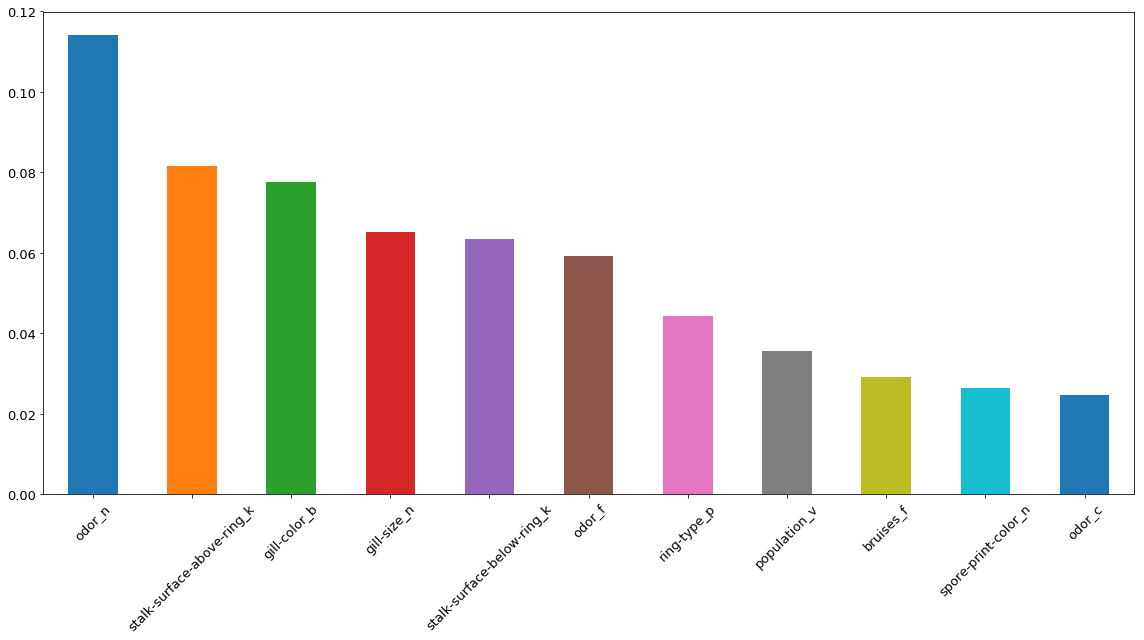

In [96]:
# Gets the importance of each features
importances = forest.feature_importances_
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, pd.get_dummies(dataset_raw_NaN.drop(["class"], axis=1)).columns)
# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)
# Get the top 10 most important features
f_importances_top_10 = f_importances.iloc[0:11]
# Draws the bar Plot for the 10 most important features 
f_importances_top_10.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=13)
# Show the plot
plt.tight_layout()
plt.show()

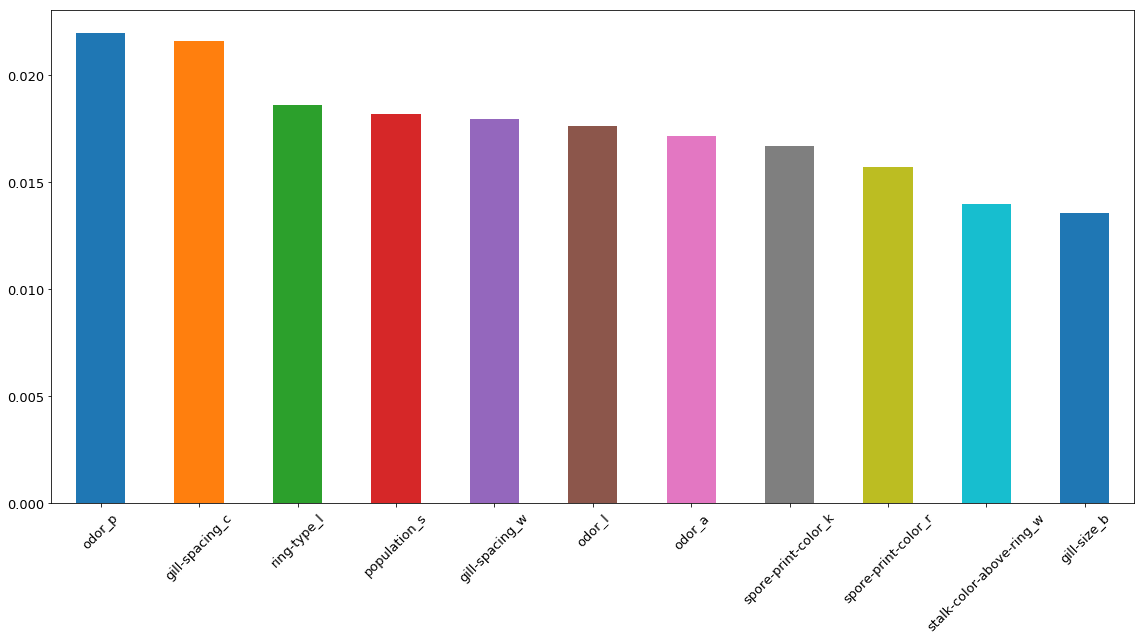

In [97]:
f_importances_top_20 = f_importances.iloc[11:22] 
f_importances_top_20.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=13)
plt.tight_layout()
plt.show()

## TODO: Do the same as below, to get the minimum number of top dummy features to get a perfect score

Let's compute the original features importance by adding up the importances of each of its corresponding dummy variables.

In [98]:
# Names of the dummy variables
features = pd.get_dummies(dataset_raw_NaN.drop(["class"], axis=1)).columns
# Computes this again because we don't wont it sorted
f_importances = pd.Series(importances, features) 
importa_dict = {}
# For each feature in the original dataframe
for i in dataset_raw_NaN.drop("class", axis = 1).columns:
    # Assign this feature as key and the sum of the importances of every dummy variable corresponding to it as value
    importa_dict[i] = f_importances[features.str.contains(i)].sum() # Subsets f_importances with the columns containing the name 
    # "i", which is the original feature name, so it gets all the dummy columns "i_..."
feat_importances = pd.Series(importa_dict).sort_values(ascending=False)

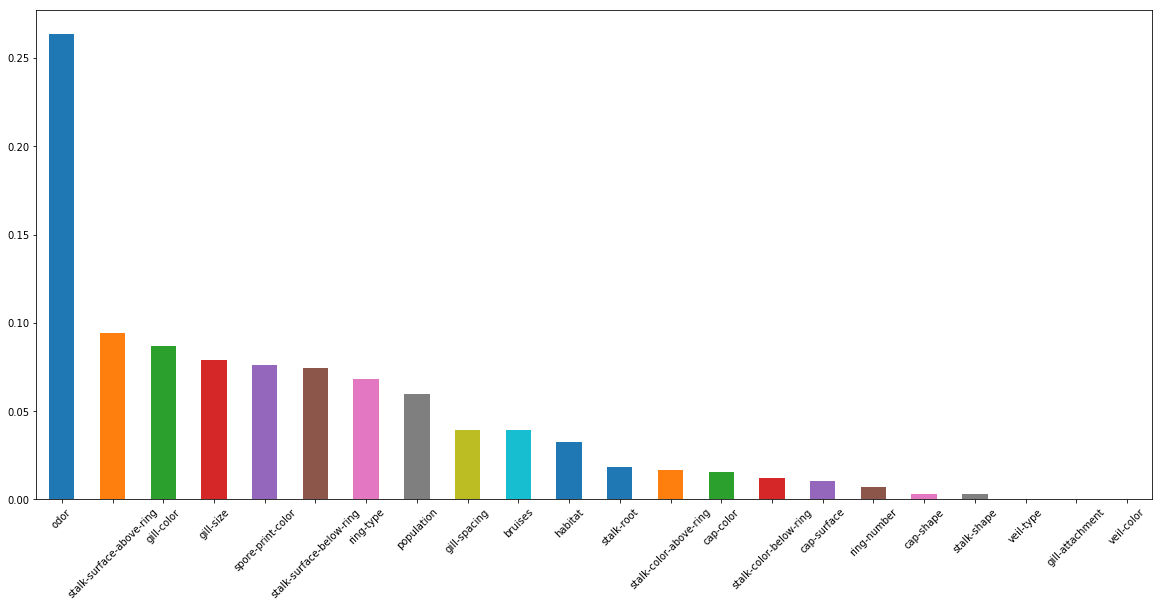

In [99]:
feat_importances.plot(kind='bar', figsize=(20,9), rot=45, fontsize=10)
plt.show()

As we already saw with the decision trees, `odor` seems to be the most relevant feature for prediction, with its importance being actually more than double the second most important feauture (`gill-color`). 

Let's see how many features we need to get a perfect score.

In [106]:
def rf_score(n_features):
    
    """"
    Returns the score of the random forest using the n_features most important features
    """
    
    # Slices the list of names of features sorted by importance from the most important until n_features
    X = dataset_raw_NaN[list(feat_importances.index)[0:n_features]]
    X = pd.get_dummies(X).values
    y = dataset_raw_NaN["class"].values
    le = LabelEncoder()
    y = le.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
    forest = RandomForestClassifier(random_state = 0)
    forest.fit(X_train, y_train)
    return forest.score(X_test, y_test)

In [107]:
for i in range(1, len(feat_importances.index)):
    if rf_score(i) == 1:
        print(i)
        break

7


So we only need 7 features out of the original 23 to get 100% percent accuracy! This should make it easier for people to identify the poisonous mushrooms! So if they have a computer (maybe phone, we could probably write an app), they can run this Random Forest on a row of data where they fill the value of every feature and it would give them an answer in order to eat the mushrooms or not.  
However, we also wanted to just tell them a way to categorize the poisonous mushrooms without using any machine... this can easily be done with decision trees!

In [108]:
list(feat_importances.index)[0:7]

['odor',
 'stalk-surface-above-ring',
 'gill-color',
 'gill-size',
 'spore-print-color',
 'stalk-surface-below-ring',
 'ring-type']

In [109]:
X = dataset_raw_NaN[list(feat_importances.index)[0:7]]
X = pd.get_dummies(X).values
y = dataset_raw_NaN["class"].values
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

1.0

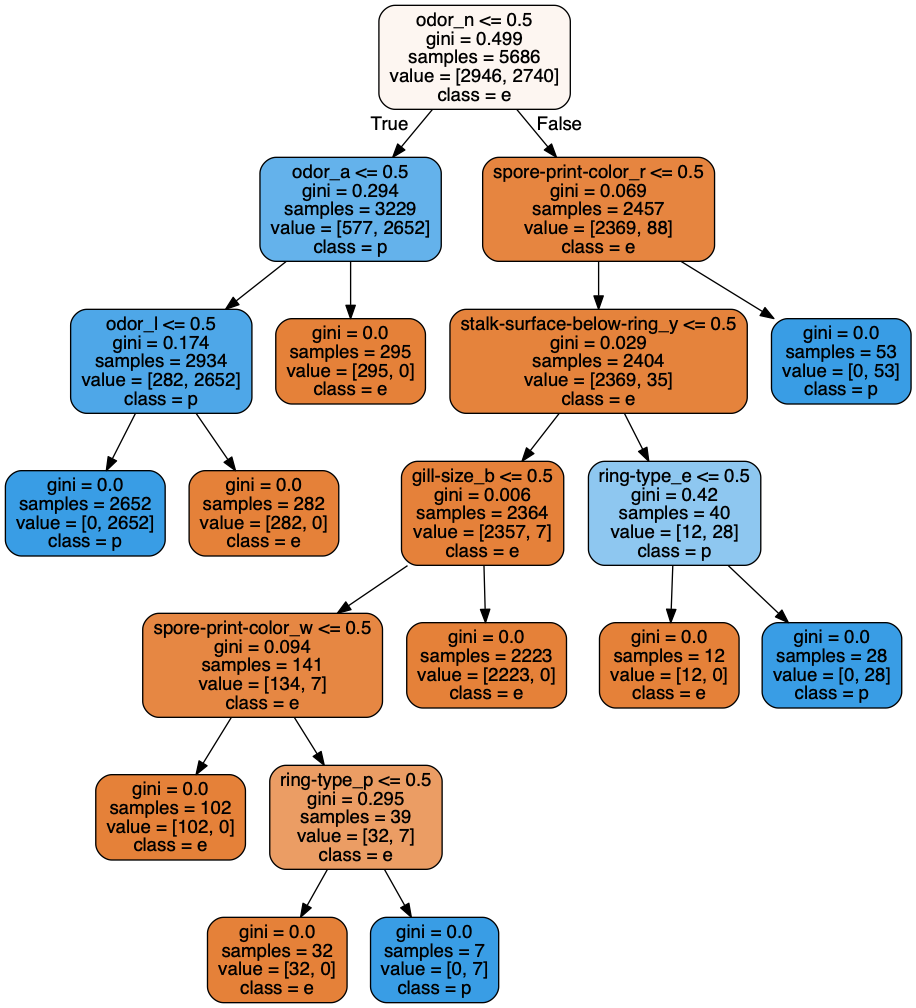

In [110]:
# Prints out the learned tree
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['e', # e comes firts because it is assigned a 0 by the LabelEncoder
                                        'p'],
                           feature_names=pd.get_dummies(dataset_raw_NaN[list(feat_importances.index)[0:7]]).columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png()) 

In [111]:
X = dataset_raw_NaN.drop("class", axis = 1)
X = pd.get_dummies(X)[["odor_n", "odor_a",
                       "odor_l", "spore-print-color_r", "stalk-surface-below-ring_y",
                       "gill-size_b", "ring-type_e", "spore-print-color_w", "ring-type_p"]]
y = dataset_raw_NaN["class"].values
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

1.0

# TODO: Try to get a perfect forest/tree but without odor, because it's a hard feature to tell. Actually try to get a perfect model only
# with features that are easy to classify

## 4.

In [94]:
X_train, y_train, X_test, y_test = preprocess(dataset_raw_NaN)
forest = train_and_test(RandomForestClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


/Users/Pedro./anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Now let's get the [features importances](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/).

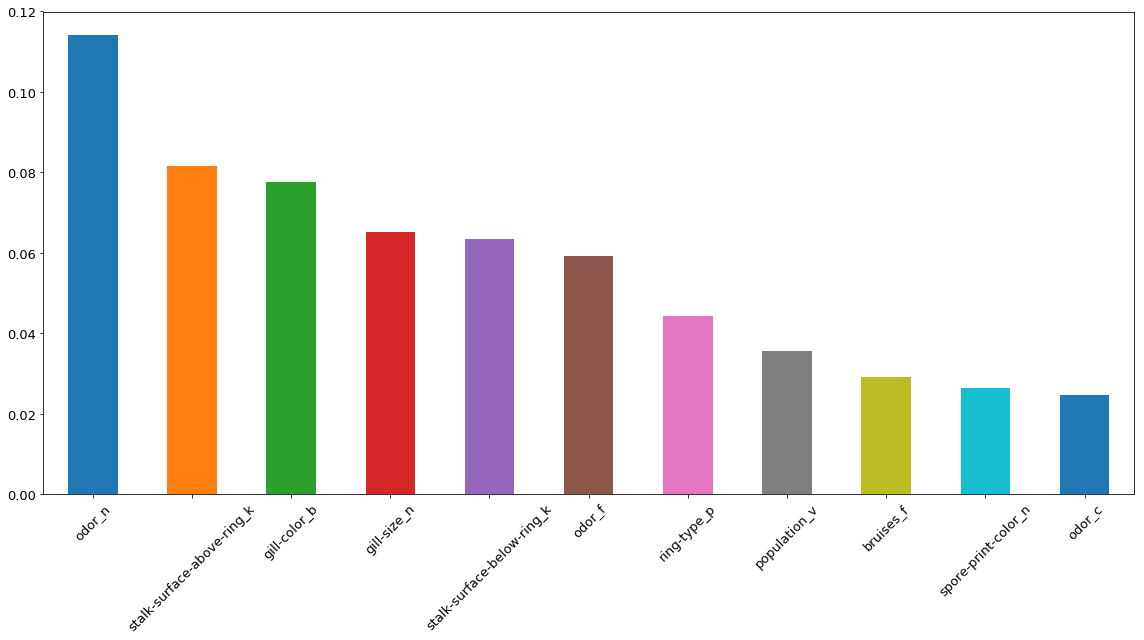

In [96]:
# Gets the importance of each features
importances = forest.feature_importances_
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, pd.get_dummies(dataset_raw_NaN.drop(["class"], axis=1)).columns)
# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)
# Get the top 10 most important features
f_importances_top_10 = f_importances.iloc[0:11]
# Draws the bar Plot for the 10 most important features 
f_importances_top_10.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=13)
# Show the plot
plt.tight_layout()
plt.show()

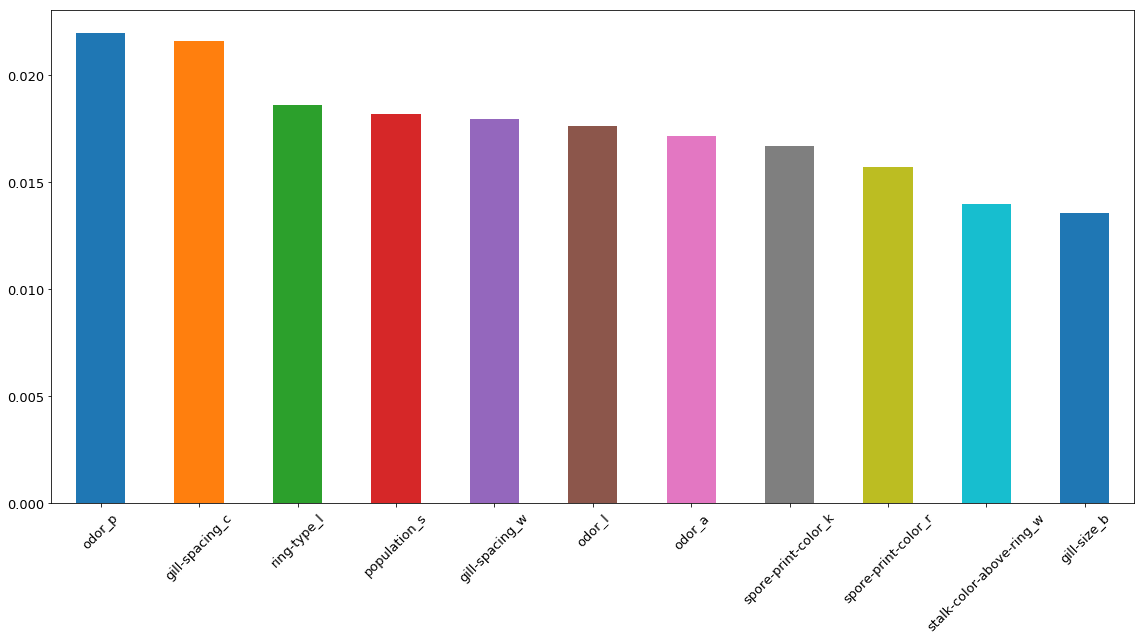

In [97]:
f_importances_top_20 = f_importances.iloc[11:22] 
f_importances_top_20.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=13)
plt.tight_layout()
plt.show()

## TODO: Do the same as below, to get the minimum number of top dummy features to get a perfect score

Let's compute the original features importance by adding up the importances of each of its corresponding dummy variables.

In [98]:
# Names of the dummy variables
features = pd.get_dummies(dataset_raw_NaN.drop(["class"], axis=1)).columns
# Computes this again because we don't wont it sorted
f_importances = pd.Series(importances, features) 
importa_dict = {}
# For each feature in the original dataframe
for i in dataset_raw_NaN.drop("class", axis = 1).columns:
    # Assign this feature as key and the sum of the importances of every dummy variable corresponding to it as value
    importa_dict[i] = f_importances[features.str.contains(i)].sum() # Subsets f_importances with the columns containing the name 
    # "i", which is the original feature name, so it gets all the dummy columns "i_..."
feat_importances = pd.Series(importa_dict).sort_values(ascending=False)

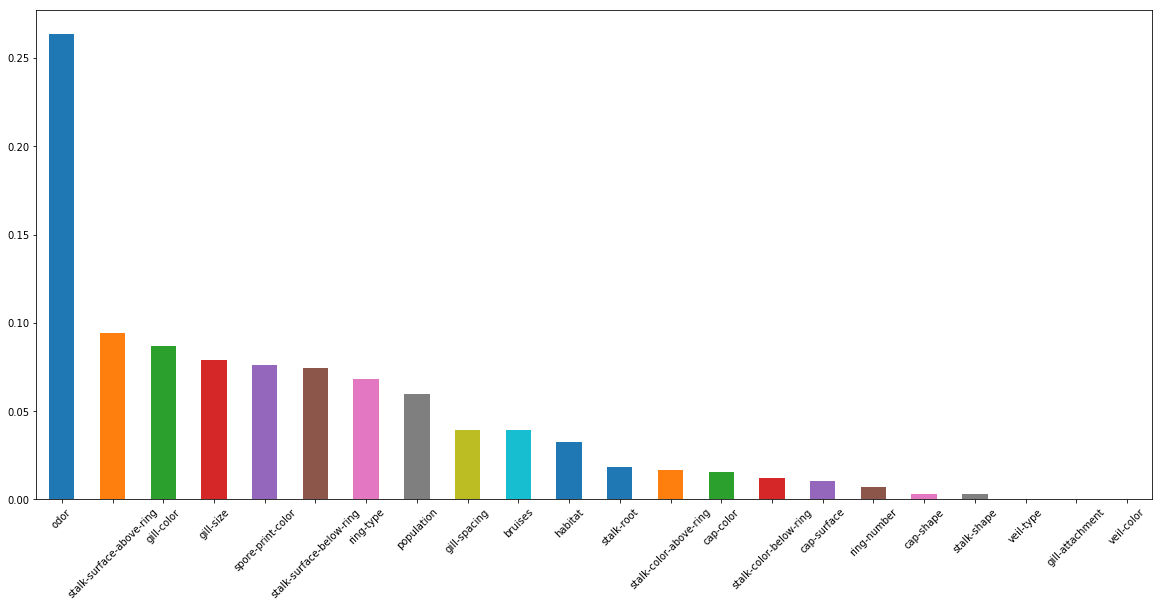

In [99]:
feat_importances.plot(kind='bar', figsize=(20,9), rot=45, fontsize=10)
plt.show()

As we already saw with the decision trees, `odor` seems to be the most relevant feature for prediction, with its importance being actually more than double the second most important feauture (`gill-color`). 

Let's see how many features we need to get a perfect score.

In [106]:
def rf_score(n_features):
    
    """"
    Returns the score of the random forest using the n_features most important features
    """
    
    # Slices the list of names of features sorted by importance from the most important until n_features
    X = dataset_raw_NaN[list(feat_importances.index)[0:n_features]]
    X = pd.get_dummies(X).values
    y = dataset_raw_NaN["class"].values
    le = LabelEncoder()
    y = le.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
    forest = RandomForestClassifier(random_state = 0)
    forest.fit(X_train, y_train)
    return forest.score(X_test, y_test)

In [107]:
for i in range(1, len(feat_importances.index)):
    if rf_score(i) == 1:
        print(i)
        break

7


So we only need 7 features out of the original 23 to get 100% percent accuracy! This should make it easier for people to identify the poisonous mushrooms! So if they have a computer (maybe phone, we could probably write an app), they can run this Random Forest on a row of data where they fill the value of every feature and it would give them an answer in order to eat the mushrooms or not.  
However, we also wanted to just tell them a way to categorize the poisonous mushrooms without using any machine... this can easily be done with decision trees!

In [108]:
list(feat_importances.index)[0:7]

['odor',
 'stalk-surface-above-ring',
 'gill-color',
 'gill-size',
 'spore-print-color',
 'stalk-surface-below-ring',
 'ring-type']

In [109]:
X = dataset_raw_NaN[list(feat_importances.index)[0:7]]
X = pd.get_dummies(X).values
y = dataset_raw_NaN["class"].values
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

1.0

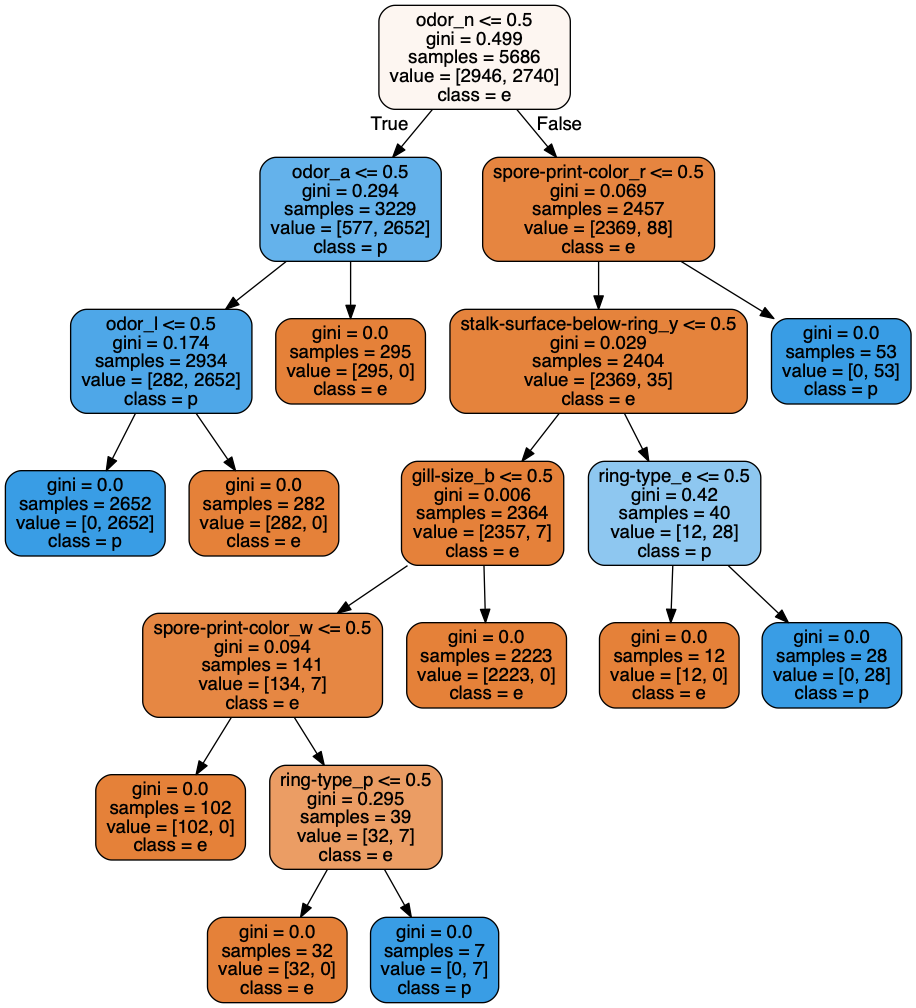

In [110]:
# Prints out the learned tree
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['e', # e comes firts because it is assigned a 0 by the LabelEncoder
                                        'p'],
                           feature_names=pd.get_dummies(dataset_raw_NaN[list(feat_importances.index)[0:7]]).columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png()) 

In [111]:
X = dataset_raw_NaN.drop("class", axis = 1)
X = pd.get_dummies(X)[["odor_n", "odor_a",
                       "odor_l", "spore-print-color_r", "stalk-surface-below-ring_y",
                       "gill-size_b", "ring-type_e", "spore-print-color_w", "ring-type_p"]]
y = dataset_raw_NaN["class"].values
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

1.0

# 4. Support Vector Machine <a name="svm"></a>

In [113]:
from sklearn.svm import SVC

In [119]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root)
svm = train_and_test(SVC(random_state = 0), [X_train, y_train], [X_test, y_test])

0.9983586376692655


In [116]:
pipe = Pipeline([('clf', SVC(random_state = 0))])

In [117]:
param_grid = [{'clf__C': [0.01, 0.1, 1, 10, 100],
               'clf__gamma': [0.01, 0.1, 1, 10, 100],
               'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]

This grid search is [very slow](https://stackoverflow.com/questions/40077432/scikit-learn-svm-svc-is-extremely-slow) for such large datasets, but still acceptable.

In [118]:
#import time
#start = time.time()
#gs = GridSearchCV(estimator=pipe,
                      #param_grid=param_grid,
                      #scoring='accuracy',
                      #cv=StratifiedKFold(n_splits=10,
                      #                   shuffle=True,
                      #                   random_state=0)) 
# Fit the pipeline
#gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators
#print(gs.best_score_, gs.best_params_, gs.best_estimator_)
#print(time.time() - start) 

# Output:

# 1.0 {'clf__C': 0.01, 'clf__gamma': 1, 'clf__kernel': 'poly'} Pipeline(memory=None,
#     steps=[('clf', SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
#  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
#  max_iter=-1, probability=False, random_state=0, shrinking=True,
#  tol=0.001, verbose=False))])
# 3607.864349126816

In [120]:
svm = train_and_test(SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
                     [X_train, y_train], [X_test, y_test])

1.0


Using only the most important features learned by random forest.

In [132]:
X_train, y_train, X_test, y_test = preprocess(mushrooms[['odor', 'stalk-surface-above-ring', 'gill-color', 'gill-size',
 'spore-print-color', 'stalk-surface-below-ring', 'ring-type', "class"]])
svm = train_and_test(SVC(), [X_train, y_train], [X_test, y_test])

0.9979482970865818


This grid search is [very slow](https://stackoverflow.com/questions/40077432/scikit-learn-svm-svc-is-extremely-slow) for such large datasets. This may be better to run after PCA!

In [126]:
#import time
#start = time.time()
#gs = GridSearchCV(estimator=pipe,
                      #param_grid=param_grid,
                      #scoring='accuracy',
                      #cv=StratifiedKFold(n_splits=10,
                      #                   shuffle=True,
                      #                   random_state=0)) 
# Fit the pipeline
#gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators#
#print(gs.best_score_, gs.best_params_, gs.best_estimator_)
#print(time.time() - start) 

# Output:

# 1.0 {'clf__C': 0.01, 'clf__gamma': 1, 'clf__kernel': 'poly'} Pipeline(memory=None,
#     steps=[('clf', SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
#  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
#  max_iter=-1, probability=False, random_state=0, shrinking=True,
#  tol=0.001, verbose=False))])
# 896.680046081543

In [127]:
X_train, y_train, X_test, y_test = preprocess(mushrooms[['odor', 'stalk-surface-above-ring', 'gill-color', 'gill-size',
 'spore-print-color', 'stalk-surface-below-ring', 'ring-type', "class"]])
svm = train_and_test(SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
                     [X_train, y_train], [X_test, y_test])

1.0


# TODO: Use PCA and interpret SVM for two or maybe 3 dimensions

In [133]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

svm = train_and_test(SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
                     [X_train, y_train], [X_test, y_test])

0.901928600738613


In [ ]:
import time
start = time.time()
gs = GridSearchCV(estimator=pipe,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0)) 
gs = gs.fit(X_train, y_train)
print(gs.best_score_, gs.best_params_, gs.best_estimator_)
print(time.time() - start) 

# 5. K-Nearest Neighbors <a name="knn"></a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root)

pipe = Pipeline([('clf', KNeighborsClassifier())])

param_grid = {'clf__n_neighbors': [5],
               'clf__p': [2]}

gs = GridSearchCV(estimator=pipe,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0)) 
# Fit the pipeline
gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators
print(gs.best_score_, gs.best_params_, gs.best_estimator_)

In [16]:
gs.best_estimator_.score(X_test, y_test)

1.0

## TODO: Use less features and/or dim reduction and make some plots...?

# 6. Naive Bayes <a name="NB"></a>

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [7]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root)
 
pipe = Pipeline([('clf', GaussianNB())])

param_grid = {'clf__priors': [None],
               'clf__var_smoothing': [1e-9]}

gs = GridSearchCV(estimator=pipe,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0)) 
# Fit the pipeline
gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators
print(gs.best_score_, gs.best_params_, gs.best_estimator_)

gs.best_estimator_.score(X_test, y_test)

In [7]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN)

pipe = Pipeline([('clf', GaussianNB())])

param_grid = {'clf__priors': [None],
               'clf__var_smoothing': [1e-9]}

gs = GridSearchCV(estimator=pipe,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0)) 
# Fit the pipeline
gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators
print(gs.best_score_, gs.best_params_, gs.best_estimator_)

gs.best_estimator_.score(X_test, y_test)

As expected, it works better for less data and with all columns.

In [12]:
X_trainn, X_testt, y_trainn, y_testt = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0, stratify = y_train)

In [13]:
gs = GridSearchCV(estimator=pipe,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0)) 
# Fit the pipeline
gs = gs.fit(X_trainn, y_trainn)
    
# Update best_score_param_estimators
print(gs.best_score_, gs.best_params_, gs.best_estimator_)

0.9971066907775769 {'clf__priors': None, 'clf__var_smoothing': 1e-09} Pipeline(memory=None,
     steps=[('clf', GaussianNB(priors=None, var_smoothing=1e-09))])


In [14]:
gs.best_estimator_.score(X_testt, y_testt)

1.0

# 7. Clustering <a name="cluster"></a>

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Splits between training and testing, stratifying by the target variable
X_train, X_test, y_train, y_test = preprocess(mushrooms_no_stalk_root) 
# Gets the indexes of the unique class labels
classes, indices = np.unique(y_train, return_index=True)
# Removes lables from y_train minus two unique ones
y_train = np.array([y_train[i] if i in indices else -1 for i in range(y_train.shape[0])])

In [84]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=2)   
y_train_pred = km.fit_predict(X_train)
dict_ = {}
#for i in range(y_train.shape[0]):
#    if y_train[i] != -1:
#        key = y_train_pred[i]
#        val = y_train[i]
#        dict_[key] = val
dict_[0] = 1
dict_[1] = 0
y_test_pred = km.predict(X_test)
y_test_pred = np.array([dict_[key] for key in y_test_pred])
from sklearn.metrics import precision_recall_fscore_support
print('Accuracy:', end=' ')
print(precision_recall_fscore_support(y_test_pred, y_test, average='micro')[0])

Accuracy: 0.9043906442347148


## Using only most significant features

In [85]:
# Gets the predictor features 
X = mushrooms[['odor','stalk-surface-above-ring','gill-color','gill-size',
                                  'spore-print-color','stalk-surface-below-ring','ring-type', "class"]]
X_train, X_test, y_train, y_test = preprocess(mushrooms_no_stalk_root)
# Gets the indexes of the unique class labels
classes, indices = np.unique(y_train, return_index=True)
# Removes lables from y_train minus two unique ones
y_train = np.array([y_train[i] if i in indices else -1 for i in range(y_train.shape[0])])

In [86]:
km = KMeans(n_clusters=2, random_state=2)   
y_train_pred = km.fit_predict(X_train)
print(y_train[:5])
print(y_train_pred[:5])
dict_ = {}
#for i in range(y_train.shape[0]):
#    if y_train[i] != -1:
#        key = y_train_pred[i]
#        val = y_train[i]
#        dict_[key] = val
dict_[0] = 1
dict_[1] = 0
y_test_pred = km.predict(X_test)
y_test_pred = np.array([dict_[key] for key in y_test_pred])
from sklearn.metrics import precision_recall_fscore_support
print('Accuracy:', end=' ')
print(precision_recall_fscore_support(y_test_pred, y_test, average='micro')[0])

[ 0 -1 -1  1 -1]
[0 1 1 0 1]
Accuracy: 0.9006975789905621


# 4.

In [8]:
# Gets a dataset without the problematic feature
mushrooms_without_NaNs = mushrooms.dropna()
# Gets the predictor features 
X = mushrooms_without_NaNs.drop(["class"], axis=1)
# And encodes them (they are all categorical)
X = pd.get_dummies(X).values
# Gets the target feature (binary)
y = mushrooms_without_NaNs["class"].values
le = LabelEncoder()
# Encodes the target
y = le.fit_transform(y)

# Splits between training and testing, stratifying by the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

# Gets the indexes of the unique class labels
classes, indices = np.unique(y_train, return_index=True)
# Removes lables from y_train minus two unique ones
y_train = np.array([y_train[i] if i in indices else -1 for i in range(y_train.shape[0])])

In [12]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=2)   
y_train_pred = km.fit_predict(X_train)
dict_ = {}
#for i in range(y_train.shape[0]):
#    if y_train[i] != -1:
#        key = y_train_pred[i]
#        val = y_train[i]
#        dict_[key] = val
dict_[0] = 0
dict_[1] = 1
y_test_pred = km.predict(X_test)
y_test_pred = np.array([dict_[key] for key in y_test_pred])
from sklearn.metrics import precision_recall_fscore_support
print('Accuracy:', end=' ')
print(precision_recall_fscore_support(y_test_pred, y_test, average='micro')[0])

Accuracy: 0.8629651506202008


In [13]:
# Gets the predictor features 
X = mushrooms.drop(["class"], axis=1)
# And encodes them (they are all categorical)
X = pd.get_dummies(X).values
# Gets the target feature (binary)
y = mushrooms["class"].values
le = LabelEncoder()
# Encodes the target
y = le.fit_transform(y)

# Splits between training and testing, stratifying by the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

# Gets the indexes of the unique class labels
classes, indices = np.unique(y_train, return_index=True)
# Removes lables from y_train minus two unique ones
y_train = np.array([y_train[i] if i in indices else -1 for i in range(y_train.shape[0])])

In [14]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=2)   
y_train_pred = km.fit_predict(X_train)
dict_ = {}
#for i in range(y_train.shape[0]):
#    if y_train[i] != -1:
#        key = y_train_pred[i]
#        val = y_train[i]
#        dict_[key] = val
dict_[0] = 0
dict_[1] = 1
y_test_pred = km.predict(X_test)
y_test_pred = np.array([dict_[key] for key in y_test_pred])
from sklearn.metrics import precision_recall_fscore_support
print('Accuracy:', end=' ')
print(precision_recall_fscore_support(y_test_pred, y_test, average='micro')[0])

Accuracy: 0.9043906442347148
